In [ ]:
# Mosaic images
#!pip install rasterio

"""
note - this cell, seems to get stuck and take a looong time to run - even if doing a subset of the images (one folder of pre images) 
Sometimes this cell gives an error - maybe because the file is too large? I haven't been able to produce an output image yet.
One folder of pre imagery is approx. 2.1 GB x 13 folders

# Reference: https://medium.com/spatial-data-science/how-to-mosaic-merge-raster-data-in-python-fb18e44f3c8
"""

# import the rasterio libraries and create the output folder with Python path lib
from rasterio.plot import show
from rasterio.merge import merge
import rasterio as rio
from pathlib import Path
path = Path('Pre-event') # path to the pre-event directory
Path('test_output').mkdir(parents=True, exist_ok=True) # create a directory to 'output' folder, make the 'output' folder if it doesn't already exist
output_path = 'test_output/test_mosaic_output.tif' # Specify the path and name for the output mosaic

# Iterate over available raster files
raster_files = list(path.iterdir())
# Create an empty list to hold the raster files within
raster_to_mosiac = []

# loop through raster files, open them with rasterio and append them to the raster_to_mosiac list we created above. 
for p in raster_files:
    raster = rio.open(p)
    raster_to_mosiac.append(raster)
    
# Use the merge() method from rasterio to create the mosaic. We also create the output transformation parameters to use later.
mosaic, output = merge(raster_to_mosiac)

# Now, we copy the raster's metadata and update it to match the height and width of the mosaic.
output_meta = raster.meta.copy()
output_meta.update(
    {"driver": "GTiff",
        "height": mosaic.shape[1],
        "width": mosaic.shape[2],
        "transform": output,
    }
)

# In this final stage, we write the mosaiced file in a local folder.
with rio.open(output_path, "w", **output_meta) as m:
    m.write(mosaic)

In [1]:
# Mosaic images
#!pip install rasterio

"""
note - this cell is a test on one folder of pre imagery - it works.
This one image is 2.1 GB

# Reference: https://medium.com/spatial-data-science/how-to-mosaic-merge-raster-data-in-python-fb18e44f3c8
"""

# import the rasterio libraries and create the output folder with Python path lib
from rasterio.plot import show
from rasterio.merge import merge
import rasterio as rio
from pathlib import Path
path = Path('Pre/10300100D5947C00') # path to the pre-event directory
Path('test_output').mkdir(parents=True, exist_ok=True) # create a directory to 'output' folder, make the 'output' folder if it doesn't already exist
output_path = 'test_output/10300100D5947C00_mosaic.tif' # Specify the path and name for the output mosaic

# Iterate over available raster files
raster_files = list(path.iterdir())
# Create an empty list to hold the raster files within
raster_to_mosiac = []

# loop through raster files, open them with rasterio and append them to the raster_to_mosiac list we created above. 
for p in raster_files:
    raster = rio.open(p)
    raster_to_mosiac.append(raster)
    
# Use the merge() method from rasterio to create the mosaic. We also create the output transformation parameters to use later.
mosaic, output = merge(raster_to_mosiac)

# Now, we copy the raster's metadata and update it to match the height and width of the mosaic.
output_meta = raster.meta.copy()
output_meta.update(
    {"driver": "GTiff",
        "height": mosaic.shape[1],
        "width": mosaic.shape[2],
        "transform": output,
    }
)

# In this final stage, we write the mosaiced file in a local folder.
with rio.open(output_path, "w", **output_meta) as m:
    m.write(mosaic)

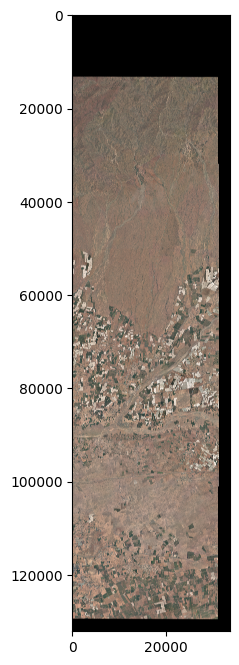

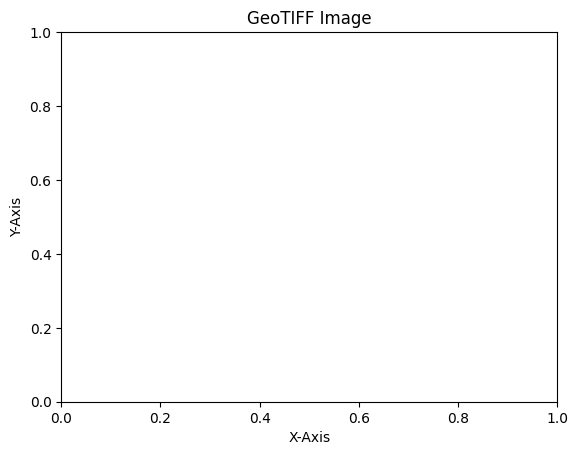

In [2]:
# # Can we visualise to make sure it worked?

# Reference: ChatGPT3.5 generated this code. This was done on 20/09/2023 with the following prompts: "can you write me python code to visualise a tif image"

import rasterio
from rasterio.plot import show
import matplotlib.pyplot as plt

# Replace 'your_image.tif' with the path to your GeoTIFF image file
image_path = 'test_output/10300100D5947C00_mosaic.tif'

# Open the GeoTIFF image using rasterio
with rasterio.open(image_path) as src:
    # Read the image as a numpy array
    image = src.read()

# Plot the image using matplotlib
plt.figure(figsize=(8, 8))
show(image, cmap='viridis')  # You can change the colormap as needed
plt.title('GeoTIFF Image')
plt.xlabel('X-Axis')
plt.ylabel('Y-Axis')
plt.show()

# This did work but it's slightly oddly laid out lol